In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
df = sns.load_dataset('penguins')

In [5]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [9]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number').dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [10]:
# Initialize PCA with desired number of components (e.g., 2 for visualization)
pca = PCA(n_components=2) 

# Fit PCA to the scaled data and transform it
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['Principal Component 1', 'Principal Component 2'])

Explained Variance Ratio: [0.68843878 0.19312919]


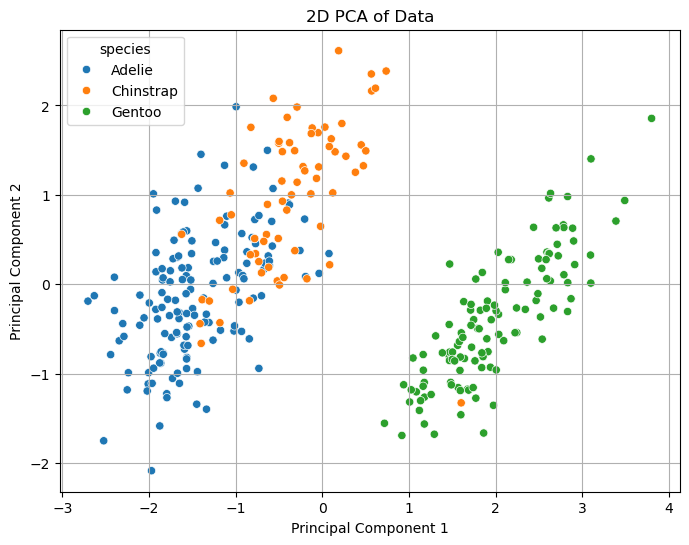

In [13]:
# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

pca_df['species']=df.dropna()['species']

# Plot the principal components (for 2 components)
plt.figure(figsize=(8, 6))
sns.scatterplot(pca_df, x='Principal Component 1', y='Principal Component 2', hue='species')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Data')
plt.grid(True)
plt.show()

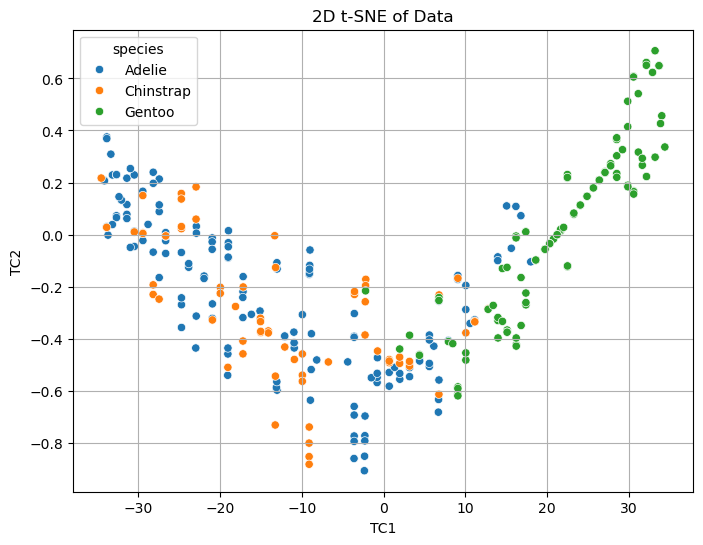

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE and transform the data
tsne_emb = tsne.fit_transform(numeric_df)
tsne_df = pd.DataFrame({'TC1':tsne_emb[:,0], 'TC2':tsne_emb[:,1]})
tsne_df['species']=df.dropna()['species']

# Plot the principal components (for 2 components)
plt.figure(figsize=(8, 6))
sns.scatterplot(tsne_df, x='TC1', y='TC2', hue='species')
plt.title('2D t-SNE of Data')
plt.grid(True)
plt.show()
